In [40]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_66Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_AllAgree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/README.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/License.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_75Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_50Agree.txt


In [3]:
df = pd.read_csv("/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv", encoding='latin1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
df.isna().sum()

neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [6]:
df.columns = ['Sentiment', 'News Headline']

In [7]:
df['Sentiment'].value_counts()

Sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

In [8]:
y=df['Sentiment'].values
y.shape

(4845,)

In [10]:
x=df['News Headline'].values

In [11]:
x.shape

(4845,)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1938,)

In [15]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

In [16]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [17]:
df_train.head()

,news,sentiment
0,"The most important export markets are Norway ,...",neutral
1,CS Cabot exports 55 % of its production mainly...,neutral
2,The company 's transportation business is cond...,neutral
3,"The buildings , with about 40 condominiums eac...",neutral
4,"When the product is manufactured in Finland , ...",neutral


In [18]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

In [19]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [20]:
df_test.head()

,news,sentiment
0,The number of magazine and newspaper readers r...,neutral
1,The Estonian beverages maker A. Le Coq today b...,neutral
2,"However , the proportion of the paid standing ...",neutral
3,The subsidiary will be responsible for filter ...,neutral
4,Outotec 's scope of delivery covers the engine...,neutral


In [21]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [23]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [24]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,The most important export markets are Norway ...,neutral
1,CS Cabot exports 55 of its production mainly ...,neutral
2,The company s transportation business is condu...,neutral
3,The buildings with about 40 condominiums each...,neutral
4,When the product is manufactured in Finland i...,neutral


In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [28]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [29]:
from collections import defaultdict

In [30]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [31]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['Production', 'expand', 'Elcoteq', 'locations', 'including', 'Mexico', 'Hungary', '2010', '']
Sentence after removing stopwords: ['Finnish', 'dental', 'care', 'group', 'Oral', 'Hammaslaakarit', 'Oyj', 'posted', 'total', 'net', 'profit', '849000', 'euro', '', '11', 'mln', 'first', 'nine', 'months', '2006', 'versus', 'net', 'loss', '331000', 'euro', '', '421000', 'period', '2005', '']
Sentence after removing stopwords: ['In', '2007', '', 'Marimekko', 'also', 'opened', 'concept', 'stores', 'Yokohama', 'Nagoya', '', 'central', 'Japan', '', 'Silver', 'Spring', 'metropolitan', 'Washington', 'DC', '', 'USA', '', 'Graz', '', 'central', 'Austria', '', 'Aalborg', '', 'northern', 'Denmark', '']
Sentence after removing stopwords: ['In', 'beginning', 'year', '', 'Wartsila', 'secured', 'order', 'deliver', 'four', 'gasfuelled', 'main', 'engines', 'propulsion', 'machinery', 'vessel', '']
Sentence after removing stopwords: ['Finland', 'Nokian', 'Tyres', 'Kazakhstan',

In [32]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['When', 'information', 'released', '5', 'September', '2008', '', 'Nokia', 'American', 'Depositary', 'shares', 'fell', '8', '', '']
Sentence after removing stopwords: ['Most', 'layoffs', 'Finland', '']
Sentence after removing stopwords: ['In', 'Finland', '', 'snow', 'storms', 'brought', 'trees', 'power', 'lines', '', 'cutting', 'electricity', '2000', 'households', '']
Sentence after removing stopwords: ['Tallink', 'Silja', 'attributes', 'significant', 'drop', 'problems', 'booking', 'system', 'taken', 'operation', 'October', '', 'sale', 'trailer', 'ferry', '', 'Sky', 'Wind', '', 'route', 'Stockholm', 'Riga', '', 'passengers', 'HelsinkiStockholm', 'route', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', '2005', 'decreased', 'EUR1', '87', 'EUR1', '89', '2003', '']
Sentence after removing stopwords: ['The', 'Finnish', 'daily', 'Kauppalehti', 'surmises', 'Finnish', 'supplier', 'Rautaruukki', 'raised', 'prices', 'Aker', 'c

In [33]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['The', 'important', 'export', 'markets', 'Norway', '', 'Germany', '', 'Russia', 'France', '']
Sentence after removing stopwords: ['CS', 'Cabot', 'exports', '55', '', 'production', 'mainly', 'Goodyear', '', 'Bridgestone', 'Michelin', 'plants', 'Poland', '', 'well', 'Germany', 'Michelin', 'Italy', 'Pirelli', 'company', 'logistics', 'center', 'Paris', '', 'Stefan', 'said', '']
Sentence after removing stopwords: ['The', 'company', 'transportation', 'business', 'conducted', 'Florida', 'Rock', '', 'Tank', 'Lines', '', 'Southeastern', 'transportation', 'company', 'concentrating', 'hauling', 'motor', 'carrier', 'liquid', 'dry', 'bulk', 'commodities', '']
Sentence after removing stopwords: ['The', 'buildings', '', '40', 'condominiums', '', 'built', '4', '5', 'stages', '']
Sentence after removing stopwords: ['When', 'product', 'manufactured', 'Finland', '', 'also', 'packed', 'country', '']
Sentence after removing stopwords: ['The', 'customer', 'cooperative', '

In [34]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [35]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [36]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [37]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

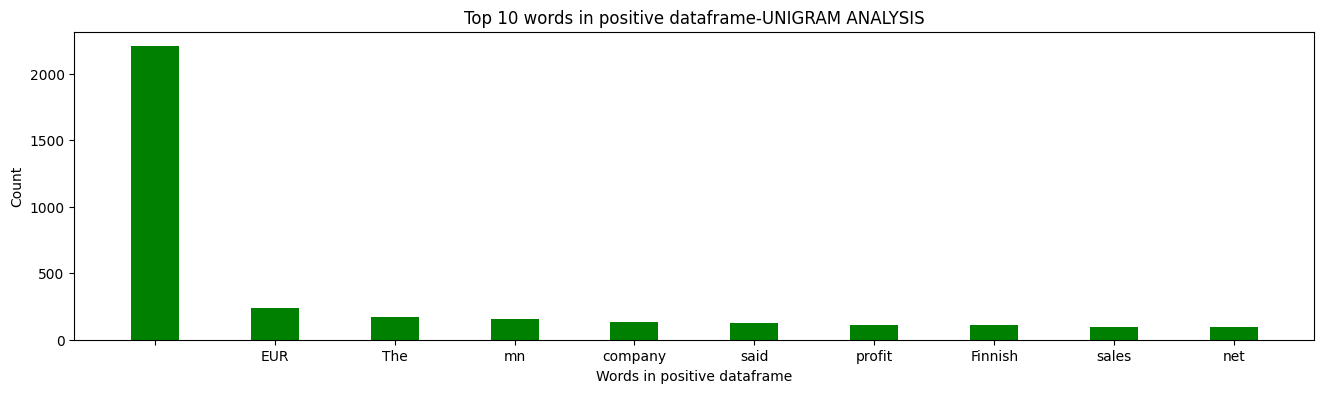

In [41]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

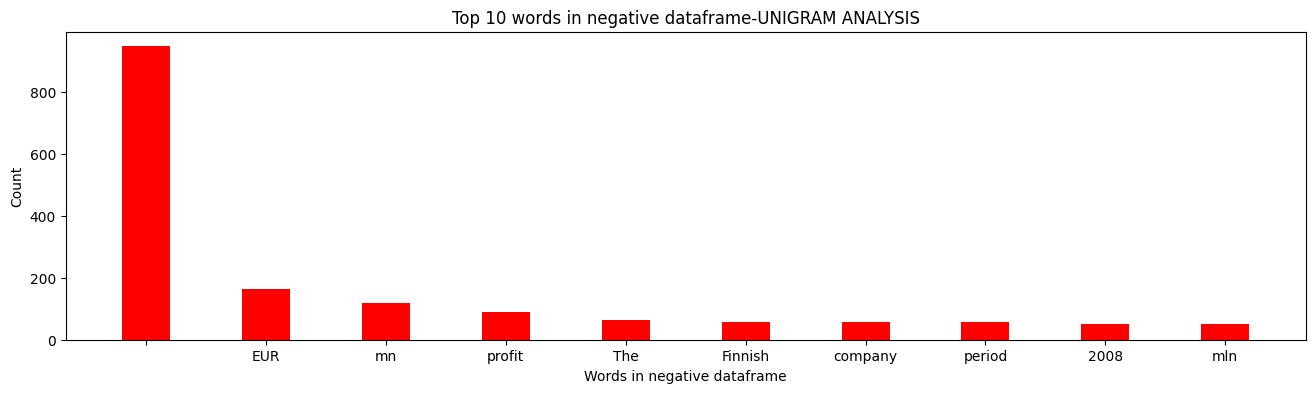

In [42]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red', width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

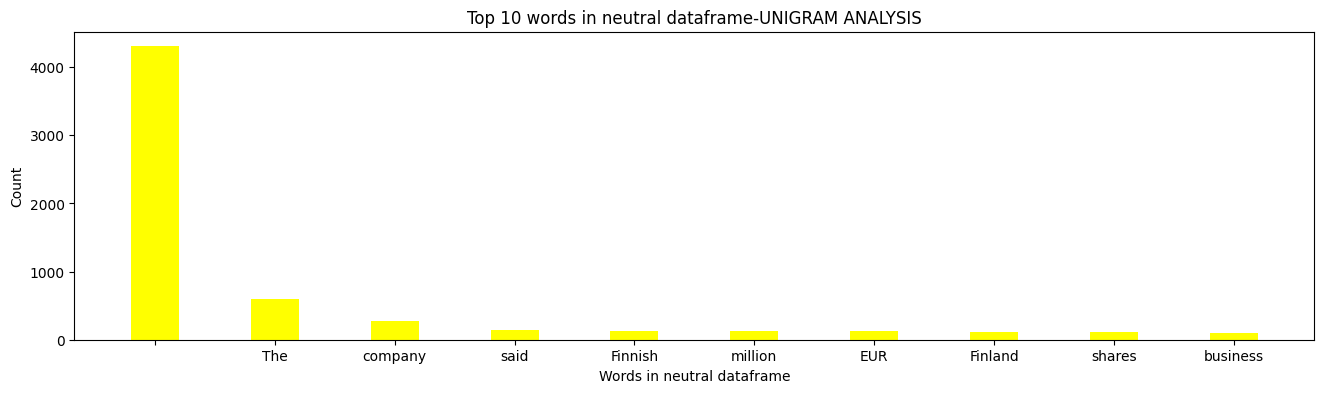

In [43]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow', width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [44]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [45]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['Production', 'expand', 'Elcoteq', 'locations', 'including', 'Mexico', 'Hungary', '2010', '']
Sentence after removing stopwords: ['Finnish', 'dental', 'care', 'group', 'Oral', 'Hammaslaakarit', 'Oyj', 'posted', 'total', 'net', 'profit', '849000', 'euro', '', '11', 'mln', 'first', 'nine', 'months', '2006', 'versus', 'net', 'loss', '331000', 'euro', '', '421000', 'period', '2005', '']
Sentence after removing stopwords: ['In', '2007', '', 'Marimekko', 'also', 'opened', 'concept', 'stores', 'Yokohama', 'Nagoya', '', 'central', 'Japan', '', 'Silver', 'Spring', 'metropolitan', 'Washington', 'DC', '', 'USA', '', 'Graz', '', 'central', 'Austria', '', 'Aalborg', '', 'northern', 'Denmark', '']
Sentence after removing stopwords: ['In', 'beginning', 'year', '', 'Wartsila', 'secured', 'order', 'deliver', 'four', 'gasfuelled', 'main', 'engines', 'propulsion', 'machinery', 'vessel', '']
Sentence after removing stopwords: ['Finland', 'Nokian', 'Tyres', 'Kazakhstan',

In [46]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['When', 'information', 'released', '5', 'September', '2008', '', 'Nokia', 'American', 'Depositary', 'shares', 'fell', '8', '', '']
Sentence after removing stopwords: ['Most', 'layoffs', 'Finland', '']
Sentence after removing stopwords: ['In', 'Finland', '', 'snow', 'storms', 'brought', 'trees', 'power', 'lines', '', 'cutting', 'electricity', '2000', 'households', '']
Sentence after removing stopwords: ['Tallink', 'Silja', 'attributes', 'significant', 'drop', 'problems', 'booking', 'system', 'taken', 'operation', 'October', '', 'sale', 'trailer', 'ferry', '', 'Sky', 'Wind', '', 'route', 'Stockholm', 'Riga', '', 'passengers', 'HelsinkiStockholm', 'route', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', '2005', 'decreased', 'EUR1', '87', 'EUR1', '89', '2003', '']
Sentence after removing stopwords: ['The', 'Finnish', 'daily', 'Kauppalehti', 'surmises', 'Finnish', 'supplier', 'Rautaruukki', 'raised', 'prices', 'Aker', 'c

In [47]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['The', 'important', 'export', 'markets', 'Norway', '', 'Germany', '', 'Russia', 'France', '']
Sentence after removing stopwords: ['CS', 'Cabot', 'exports', '55', '', 'production', 'mainly', 'Goodyear', '', 'Bridgestone', 'Michelin', 'plants', 'Poland', '', 'well', 'Germany', 'Michelin', 'Italy', 'Pirelli', 'company', 'logistics', 'center', 'Paris', '', 'Stefan', 'said', '']
Sentence after removing stopwords: ['The', 'company', 'transportation', 'business', 'conducted', 'Florida', 'Rock', '', 'Tank', 'Lines', '', 'Southeastern', 'transportation', 'company', 'concentrating', 'hauling', 'motor', 'carrier', 'liquid', 'dry', 'bulk', 'commodities', '']
Sentence after removing stopwords: ['The', 'buildings', '', '40', 'condominiums', '', 'built', '4', '5', 'stages', '']
Sentence after removing stopwords: ['When', 'product', 'manufactured', 'Finland', '', 'also', 'packed', 'country', '']
Sentence after removing stopwords: ['The', 'customer', 'cooperative', '

In [48]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [49]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [50]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [51]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

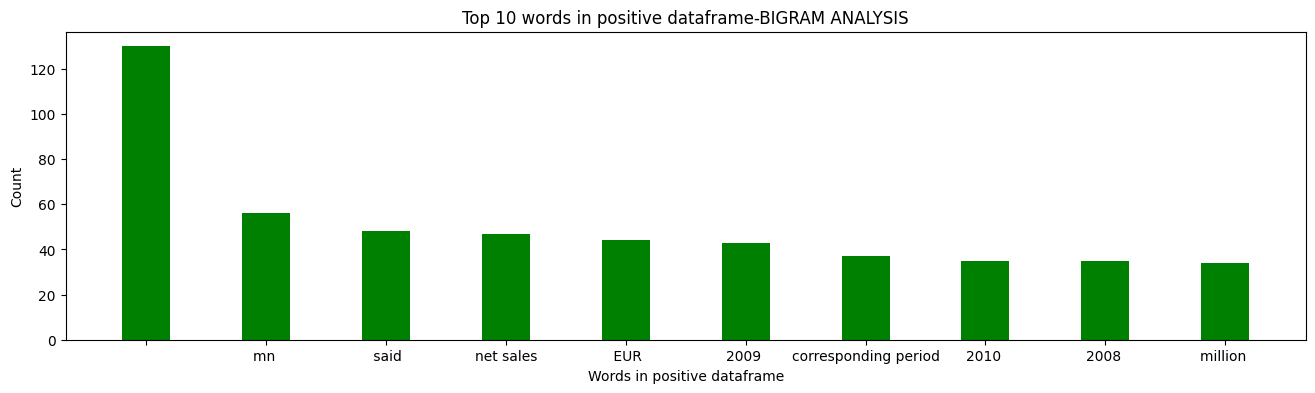

In [60]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

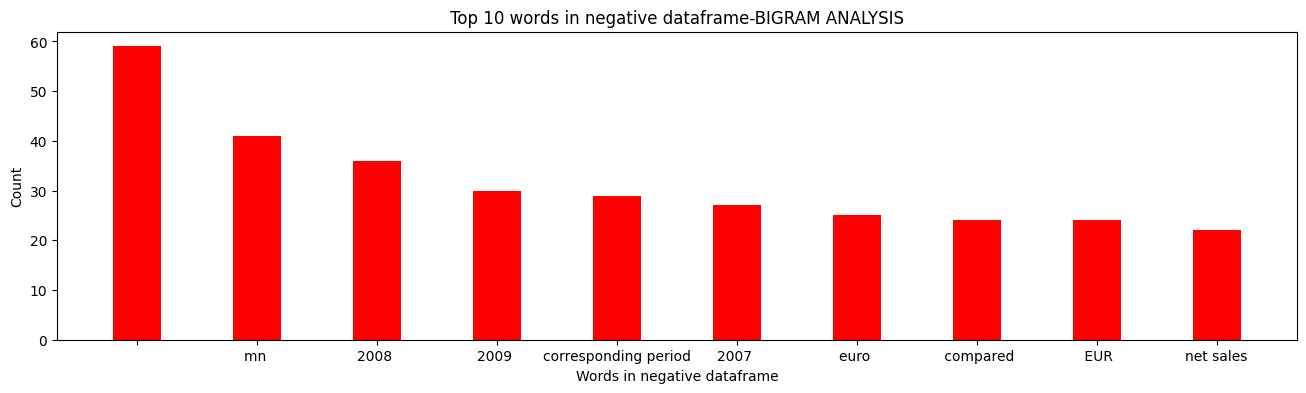

In [59]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red', width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

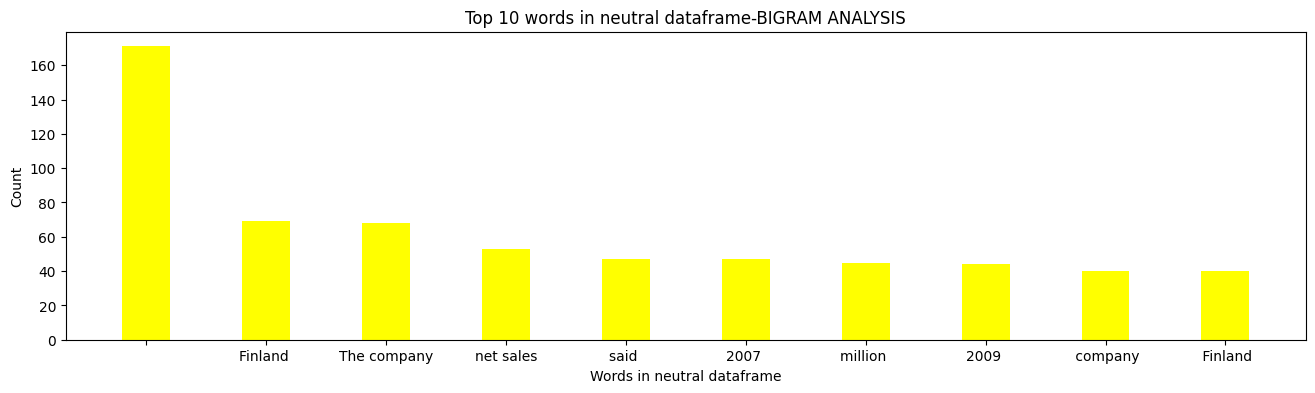

In [61]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow', width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

In [62]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [63]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['Production', 'expand', 'Elcoteq', 'locations', 'including', 'Mexico', 'Hungary', '2010', '']
Sentence after removing stopwords: ['Finnish', 'dental', 'care', 'group', 'Oral', 'Hammaslaakarit', 'Oyj', 'posted', 'total', 'net', 'profit', '849000', 'euro', '', '11', 'mln', 'first', 'nine', 'months', '2006', 'versus', 'net', 'loss', '331000', 'euro', '', '421000', 'period', '2005', '']
Sentence after removing stopwords: ['In', '2007', '', 'Marimekko', 'also', 'opened', 'concept', 'stores', 'Yokohama', 'Nagoya', '', 'central', 'Japan', '', 'Silver', 'Spring', 'metropolitan', 'Washington', 'DC', '', 'USA', '', 'Graz', '', 'central', 'Austria', '', 'Aalborg', '', 'northern', 'Denmark', '']
Sentence after removing stopwords: ['In', 'beginning', 'year', '', 'Wartsila', 'secured', 'order', 'deliver', 'four', 'gasfuelled', 'main', 'engines', 'propulsion', 'machinery', 'vessel', '']
Sentence after removing stopwords: ['Finland', 'Nokian', 'Tyres', 'Kazakhstan',

In [64]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['When', 'information', 'released', '5', 'September', '2008', '', 'Nokia', 'American', 'Depositary', 'shares', 'fell', '8', '', '']
Sentence after removing stopwords: ['Most', 'layoffs', 'Finland', '']
Sentence after removing stopwords: ['In', 'Finland', '', 'snow', 'storms', 'brought', 'trees', 'power', 'lines', '', 'cutting', 'electricity', '2000', 'households', '']
Sentence after removing stopwords: ['Tallink', 'Silja', 'attributes', 'significant', 'drop', 'problems', 'booking', 'system', 'taken', 'operation', 'October', '', 'sale', 'trailer', 'ferry', '', 'Sky', 'Wind', '', 'route', 'Stockholm', 'Riga', '', 'passengers', 'HelsinkiStockholm', 'route', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', '2005', 'decreased', 'EUR1', '87', 'EUR1', '89', '2003', '']
Sentence after removing stopwords: ['The', 'Finnish', 'daily', 'Kauppalehti', 'surmises', 'Finnish', 'supplier', 'Rautaruukki', 'raised', 'prices', 'Aker', 'c

In [65]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['The', 'important', 'export', 'markets', 'Norway', '', 'Germany', '', 'Russia', 'France', '']
Sentence after removing stopwords: ['CS', 'Cabot', 'exports', '55', '', 'production', 'mainly', 'Goodyear', '', 'Bridgestone', 'Michelin', 'plants', 'Poland', '', 'well', 'Germany', 'Michelin', 'Italy', 'Pirelli', 'company', 'logistics', 'center', 'Paris', '', 'Stefan', 'said', '']
Sentence after removing stopwords: ['The', 'company', 'transportation', 'business', 'conducted', 'Florida', 'Rock', '', 'Tank', 'Lines', '', 'Southeastern', 'transportation', 'company', 'concentrating', 'hauling', 'motor', 'carrier', 'liquid', 'dry', 'bulk', 'commodities', '']
Sentence after removing stopwords: ['The', 'buildings', '', '40', 'condominiums', '', 'built', '4', '5', 'stages', '']
Sentence after removing stopwords: ['When', 'product', 'manufactured', 'Finland', '', 'also', 'packed', 'country', '']
Sentence after removing stopwords: ['The', 'customer', 'cooperative', '

In [66]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

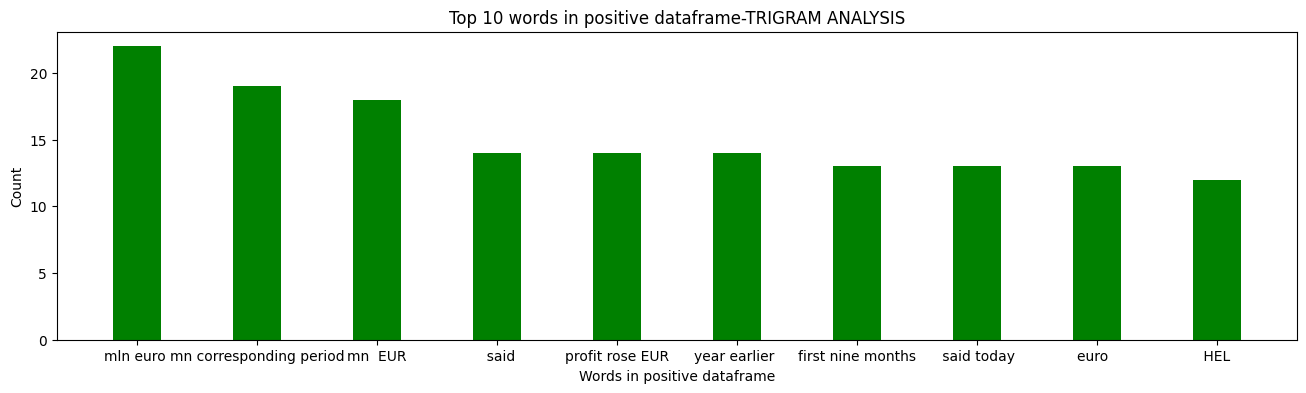

In [67]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

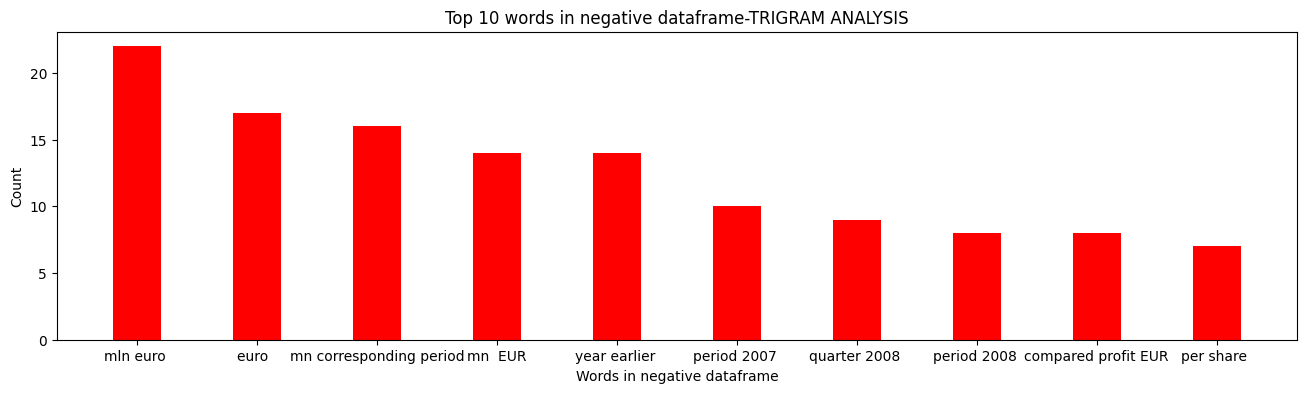

In [68]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

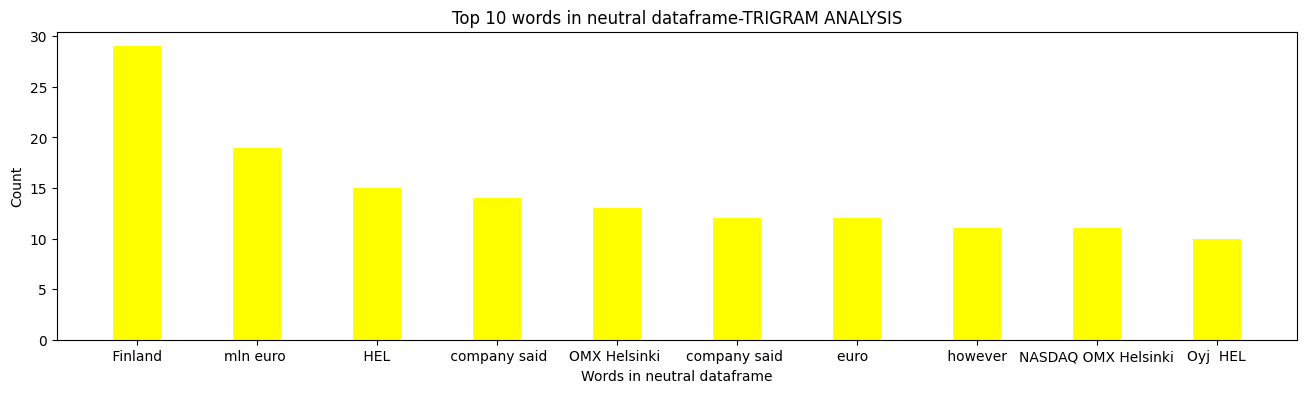

In [69]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()